# Project3 - Understand Gold Sentiment

# Description

For this miniproject 3, we will use Twitter and Google Newsfeed to perform Sentiment Analysis for Financial Market.

In [185]:
import numpy as np      # Import numpy and pandas to work with dataframes
import pandas as pd
from matplotlib import pyplot as plt     # Import seaborn and matplotlib for viz
import tweepy as tw     # Import tweepy to work with the twitter API

# Process

1. Collect Data
2. Perform Sentiment Analysis
3. Use Machine Learning Techniques to Analyse the Data

# 1a. Fetch Data from Twitter

In [252]:
import json
f = open('../Key/twitterkeys.json')     # Opening JSON file
data = json.load(f)     # returns JSON object as a dictionary

consumer_key = data["consumer_key"]
consumer_secret = data["consumer_secret"]
access_token = data["access_token"]
access_token_secret = data["access_token_secret"]

f.close()

In [253]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth)
#api = tw.API(auth, wait_on_rate_limit=True)

In [254]:
#hashtag = "#presidentialdebate"
hashtag = "#GOLD XAUUSD"
query = tw.Cursor(api.search_tweets, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': 'Gold is $1894.09/ozt @ 20:00 UTC.\n\n24H change: -$4.56 (-0.24%)\n30D change: +$79.81 (+4.40%)\n\n#GOLD $XAU $XAUUSD', 'Timestamp': datetime.datetime(2022, 2, 18, 20, 0, 5, tzinfo=datetime.timezone.utc)}, {'Tweet': "Gold signal running deep profits on the free telegram group today, why haven't you joined us yet… https://t.co/V93T89EcGi", 'Timestamp': datetime.datetime(2022, 2, 18, 19, 58, 34, tzinfo=datetime.timezone.utc)}, {'Tweet': '#XAUUSD SELL\nENTRY:  1895.8\nSL:  1902\nTP:  1892\nTP:  1888\nTP:  1880\nTP:  Open\n\nDm now:\nhttps://t.co/cKrKbfqzpP… https://t.co/k0ogLkAWtJ', 'Timestamp': datetime.datetime(2022, 2, 18, 19, 48, 7, tzinfo=datetime.timezone.utc)}, {'Tweet': 'Check out my #XAUUSD analysis on @TradingView: https://t.co/QJn1i8B6VB \n\n#short the #bullshit to the #ground… https://t.co/JmlfueMa3Y', 'Timestamp': datetime.datetime(2022, 2, 18, 19, 28, 27, tzinfo=datetime.timezone.utc)}, {'Tweet': '勝ってる奴の大半が感覚的な裁量トレーダーな理由はこれ\nhttps://t.co/4hkXEsLF6N\n\n#FX #FOREX #

In [255]:
df_twitter = pd.DataFrame.from_dict(tweets)
df_twitter

,Tweet,Timestamp
0,Gold is $1894.09/ozt @ 20:00 UTC.\n\n24H chang...,2022-02-18 20:00:05+00:00
1,Gold signal running deep profits on the free t...,2022-02-18 19:58:34+00:00
2,#XAUUSD SELL\nENTRY: 1895.8\nSL: 1902\nTP: ...,2022-02-18 19:48:07+00:00
3,Check out my #XAUUSD analysis on @TradingView:...,2022-02-18 19:28:27+00:00
4,勝ってる奴の大半が感覚的な裁量トレーダーな理由はこれ\nhttps://t.co/4hkXE...,2022-02-18 19:28:00+00:00
...,...,...
995,RT @xtradering: Gold \nShortçulara selam olsun...,2022-02-17 14:10:12+00:00
996,All Target Hit and Book $550 Profit. Hope my f...,2022-02-17 14:09:24+00:00
997,1900円位までは売り目線継続で攻めようかと思う🦍\n・\n・\n・\n・\n・\nでも建値...,2022-02-17 14:07:50+00:00
998,#Gold #XAUUSD #ALTIN \n\nBu kırılım 2.300 bölg...,2022-02-17 14:06:33+00:00


# 1b. Fetch Data from Google News

In [281]:
          
googlenews = GoogleNews(lang='en', region='US', period = '2d')

In [333]:
googlenews.clear()

In [334]:
googlenews.search('XAUUSD')
googlenews.getpage(3)
result = googlenews.result()
df_gnews=pd.DataFrame(result)
df_gnews.shape

(20, 7)

In [335]:
df_gnews

,title,media,date,datetime,desc,link,img
0,Gold Price Technical Forecast: The War Bid Tak...,DailyFX,1 hour ago,2022-02-19 04:18:37.766778,Gold has jumped up to a fresh eight-month-high...,https://www.dailyfx.com/forex/technical/articl...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,"Gold Price Forecast: XAU/USD to target $1,925 ...",FXStreet,5 hours ago,2022-02-19 00:18:37.773696,Gold capitalized on safe-haven flows throughou...,https://www.fxstreet.com/news/gold-price-forec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Gold Price Analysis: XAU/USD falls back from $...,FXStreet,8 hours ago,2022-02-18 21:18:37.781272,Having failed to break convincingly above the ...,https://www.fxstreet.com/news/gold-price-analy...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Gold Price Forecast: XAU/USD bulls keep eyes o...,FXStreet,2 hours ago,2022-02-19 03:18:37.782303,Gold price remains at the mercy of the geopoli...,https://www.fxstreet.com/news/gold-price-forec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Gold Price Forecast: Rate hikes no concern for...,FXStreet,3 hours ago,2022-02-19 02:18:37.783314,Popular opinion is that interest rate hikes ar...,https://www.fxstreet.com/news/gold-price-forec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
5,Gold Price Forecast: XAU/USD keeps bullish bia...,FXStreet,4 hours ago,2022-02-19 01:18:37.784311,Gold price retreats from above $1900 on hopes ...,https://www.fxstreet.com/news/gold-price-forec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
6,Gold Price Forecast: XAU/USD corrects from mul...,FXStreet,5 hours ago,2022-02-19 00:18:37.786227,Gold struggled to find acceptance above the $1...,https://www.fxstreet.com/news/gold-price-forec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
7,Gold Price Forecast: XAU/USD remains a ‘buy th...,FXStreet,7 hours ago,2022-02-18 22:18:37.787323,Gold price is receding in tandem with the risk...,https://www.fxstreet.com/analysis/gold-price-f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
8,Gold Price Forecast: XAU/USD eases from eight-...,FXStreet,9 hours ago,2022-02-18 20:18:37.787323,"Gold holds near the fresh cycle highs of $1,90...",https://www.fxstreet.com/news/gold-price-forec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
9,Gold Price Forecast: Bullish breakout as immin...,FXStreet,1 day ago,2022-02-18 05:18:37.794228,Spot gold flirts with the $1900 threshold amid...,https://www.fxstreet.com/analysis/gold-price-f...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [312]:
df_gnews.to_csv(r'./gnews.csv', index = False)

# 2a. Preprocessing Twitter

In [256]:
# Import stopwords
import nltk     # Natural Language Toolkit
from nltk.corpus import stopwords
# Import textblob
from textblob import Word, TextBlob
import re

In [257]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [260]:
def datacleaning(tweet):
    cleaned_sentence = tweet
    cleaned_sentence.replace('[^\w\s]', '')
    cleaned_sentence = ' '.join(re.split('[^a-zA-Z]', cleaned_sentence))
    cleaned_sentence = " ".join(word for word in cleaned_sentence.split() if word not in stop_words)     # Remove Stopwords
    cleaned_sentence = " ".join(Word(word).lemmatize() for word in cleaned_sentence.split())
    return(cleaned_sentence)

df_twitter['Processed Tweet'] = df_twitter['Tweet'].apply(lambda x: datacleaning(x))
df_twitter.head()

,Tweet,Timestamp,Processed Tweet
0,Gold is $1894.09/ozt @ 20:00 UTC.\n\n24H chang...,2022-02-18 20:00:05+00:00,Gold ozt UTC H change D change GOLD XAU XAUUSD
1,Gold signal running deep profits on the free t...,2022-02-18 19:58:34+00:00,Gold signal running deep profit free telegram ...
2,#XAUUSD SELL\nENTRY: 1895.8\nSL: 1902\nTP: ...,2022-02-18 19:48:07+00:00,XAUUSD SELL ENTRY SL TP TP TP TP Open Dm http ...
3,Check out my #XAUUSD analysis on @TradingView:...,2022-02-18 19:28:27+00:00,Check XAUUSD analysis TradingView http co QJn ...
4,勝ってる奴の大半が感覚的な裁量トレーダーな理由はこれ\nhttps://t.co/4hkXE...,2022-02-18 19:28:00+00:00,http co hkXEsLF N FX FOREX BTC Crypto GOLD XAU...


In [258]:
'''
def preprocess_tweets(tweet):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = ' '.join(re.split('[^a-zA-Z]', processed_tweet))
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)     # Remove Stopwords
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)
'''


,Tweet,Timestamp,Processed Tweet
0,Gold is $1894.09/ozt @ 20:00 UTC.\n\n24H chang...,2022-02-18 20:00:05+00:00,Gold ozt UTC H change D change GOLD XAU XAUUSD
1,Gold signal running deep profits on the free t...,2022-02-18 19:58:34+00:00,Gold signal running deep profit free telegram ...
2,#XAUUSD SELL\nENTRY: 1895.8\nSL: 1902\nTP: ...,2022-02-18 19:48:07+00:00,XAUUSD SELL ENTRY SL TP TP TP TP Open Dm http ...
3,Check out my #XAUUSD analysis on @TradingView:...,2022-02-18 19:28:27+00:00,Check XAUUSD analysis TradingView http co QJn ...
4,勝ってる奴の大半が感覚的な裁量トレーダーな理由はこれ\nhttps://t.co/4hkXE...,2022-02-18 19:28:00+00:00,http co hkXEsLF N FX FOREX BTC Crypto GOLD XAU...


In [193]:
print('Base review\n', df_twitter['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df_twitter['Processed Tweet'][0])

Base review
 $XAUUSD #GOLD - 15 min.: Sur cette unité de temps, la tendance de fond est faiblement haussière et le court terme e… https://t.co/w1iRFlZoPk

------------------------------------

Cleaned and lemmatized review
 XAUUSD GOLD min Sur cette unit de temp la tendance de fond est faiblement haussi et le court terme e http co w iRFlZoPk


In [194]:
df_twitter = df_twitter.drop(columns=['Tweet','Timestamp'])
df_twitter

,Processed Tweet
0,XAUUSD GOLD min Sur cette unit de temp la tend...
1,XAUUSD GOLD min Sur cette unit de temp la tend...
2,JIASBOT JIASGOLD th order Gold booked loss Net...
3,XAUUSD BUY NOW XAUUSD GOLD GOLD sl tp tp tp op...
4,RT bdfx FX fx
...,...
995,Gold Price Forecast XAU USD set floor amid wid...
996,XAUUSD GOLD MIN MA SL PIP http co MUrI gches h...
997,Gold stand mark next target Gold XAUUSD
998,RT bdfx FX FX FX XAUUSD GOLD http co mtnfl Ygqq


# 2b. Preprocessing Google News

In [336]:
df_gnews['processed title'] = df_gnews['title'].apply(lambda x: datacleaning(x))
df_gnews['processed desc'] = df_gnews['desc'].apply(lambda x: datacleaning(x))
df_gnews.head()

,title,media,date,datetime,desc,link,img,processed title,processed desc
0,Gold Price Technical Forecast: The War Bid Tak...,DailyFX,1 hour ago,2022-02-19 04:18:37.766778,Gold has jumped up to a fresh eight-month-high...,https://www.dailyfx.com/forex/technical/articl...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Gold Price Technical Forecast The War Bid Take...,Gold jumped fresh eight month high week may do...
1,"Gold Price Forecast: XAU/USD to target $1,925 ...",FXStreet,5 hours ago,2022-02-19 00:18:37.773696,Gold capitalized on safe-haven flows throughou...,https://www.fxstreet.com/news/gold-price-forec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Gold Price Forecast XAU USD target daily close,Gold capitalized safe flow throughout week A d...
2,Gold Price Analysis: XAU/USD falls back from $...,FXStreet,8 hours ago,2022-02-18 21:18:37.781272,Having failed to break convincingly above the ...,https://www.fxstreet.com/news/gold-price-analy...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Gold Price Analysis XAU USD fall back level am...,Having failed break convincingly level late Th...
3,Gold Price Forecast: XAU/USD bulls keep eyes o...,FXStreet,2 hours ago,2022-02-19 03:18:37.782303,Gold price remains at the mercy of the geopoli...,https://www.fxstreet.com/news/gold-price-forec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Gold Price Forecast XAU USD bull keep eye amid...,Gold price remains mercy geopolitical developm...
4,Gold Price Forecast: Rate hikes no concern for...,FXStreet,3 hours ago,2022-02-19 02:18:37.783314,Popular opinion is that interest rate hikes ar...,https://www.fxstreet.com/news/gold-price-forec...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Gold Price Forecast Rate hike concern XAU USD ANZ,Popular opinion interest rate hike bearish gol...


In [337]:
df_gnews = df_gnews.drop(columns=['media','date','datetime','link','img'])
df_gnews['processed'] = df_gnews['processed title']+df_gnews['processed desc']

# 2a. Calculate Twitter Sentiment

In [325]:
def MarketSentiment(sentence):
    value = 0
    positivewords = ['buy', 'long', 'bulls', 'bullish', 'upside', 'support', 'rise', 'rises', 'high', 'highs', 'higher', 'bottom', 'win']
    negativewords = ['sell', 'short', 'bears', 'bearish', 'downside', 'resistance', 'low', 'lows', 'fall', 'falls', 'lower', 'top', 'lose', 'war', 'inflation']
       
    for word in sentence.split():
        if word.lower() in positivewords:
            value = value + 1
        elif word.lower() in negativewords:
            value = value - 1
    
    if value > 0: 
        value = 1
    elif value < 0: 
        value = -1
        
    return(value)

In [326]:
df_twitter['polarity'] = df_twitter['Processed Tweet'].apply(lambda x: MarketSentiment(x))

In [327]:
df_twitter.to_csv(r'./twitter.csv', index = False)

In [202]:
df_twitter

,Processed Tweet,polarity
0,XAUUSD GOLD min Sur cette unit de temp la tend...,0
1,XAUUSD GOLD min Sur cette unit de temp la tend...,0
2,JIASBOT JIASGOLD th order Gold booked loss Net...,1
3,XAUUSD BUY NOW XAUUSD GOLD GOLD sl tp tp tp op...,1
4,RT bdfx FX fx,0
...,...,...
995,Gold Price Forecast XAU USD set floor amid wid...,0
996,XAUUSD GOLD MIN MA SL PIP http co MUrI gches h...,0
997,Gold stand mark next target Gold XAUUSD,0
998,RT bdfx FX FX FX XAUUSD GOLD http co mtnfl Ygqq,0


# 2b. Calculate GoogleNews Sentiment

In [338]:
df_gnews['polarity'] = df_gnews['processed'].apply(lambda x: MarketSentiment(x))

In [339]:
df_gnews['polarity']

0     0
1     0
2    -1
3     0
4    -1
5     1
6     0
7     1
8     1
9     1
10    1
11    0
12   -1
13    1
14   -1
15    0
16    1
17   -1
18    0
19    0
Name: polarity, dtype: int64

# 3a. Visualize Market Sentiment

In [348]:
df_twitter['polarity'].value_counts()

 0    781
 1    130
-1     89
Name: polarity, dtype: int64

<AxesSubplot:title={'center':'Market Analysis for Twitter'}>

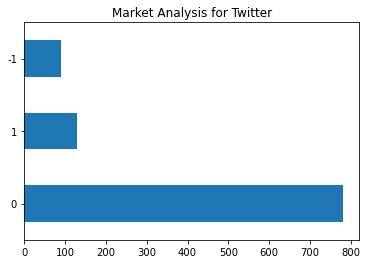

In [346]:
# Twitter
df_twitter['polarity'].value_counts()[:20].plot(kind='barh', title='Market Analysis for Twitter')

In [349]:
df_gnews['polarity'].value_counts()

 0    8
 1    7
-1    5
Name: polarity, dtype: int64

<AxesSubplot:title={'center':'Market Analysis for Google News'}>

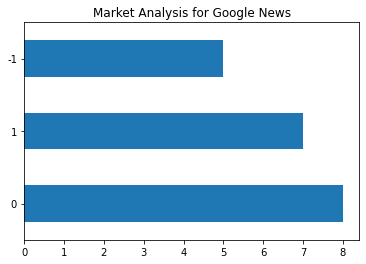

In [347]:
# Google News
df_gnews['polarity'].value_counts()[:20].plot(kind='barh', title='Market Analysis for Google News')

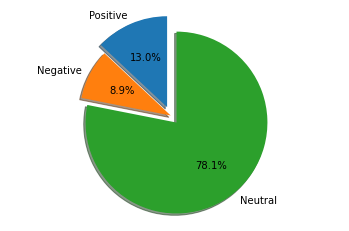

In [341]:
# Twitter
neutral, positive, negative = df_twitter['polarity'].value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
explode = (0.1, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

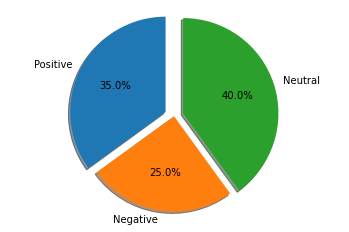

In [342]:
# Google News
neutral, positive, negative = df_gnews['polarity'].value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive, negative, neutral]
explode = (0.1, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Text Classification

Now we try to import the Twitter results back to the system for Text Classification

In [377]:
df = pd.read_csv('./twitter.csv')
df = df.drop(columns=['Tweet','Timestamp'])

trainDF = df
trainDF = trainDF.rename(columns={'Processed Tweet': 'text','polarity': 'label'})
trainDF

,text,label
0,Gold ozt UTC H change D change GOLD XAU XAUUSD,0
1,Gold signal running deep profit free telegram ...,0
2,XAUUSD SELL ENTRY SL TP TP TP TP Open Dm http ...,-1
3,Check XAUUSD analysis TradingView http co QJn ...,-1
4,http co hkXEsLF N FX FOREX BTC Crypto GOLD XAU...,0
...,...,...
995,RT xtradering Gold Short ulara selam olsun st ...,-1
996,All Target Hit Book Profit Hope follower take ...,0
997,sl FX XAUUSD Gold http co Gw YBwko,0
998,Gold XAUUSD ALTIN Bu k r l b lgesine kseli tre...,0


In [355]:
## split the dataset
from sklearn.model_selection import train_test_split
X = df['Processed Tweet']
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [378]:
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer object
count_vect = CountVectorizer(token_pattern = r'\w{1,}')
# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(trainDF['text'])
# Transform documents to document-term matrix.
X_train_count = count_vect.transform(X_train)
X_test_count = count_vect.transform(X_test)

In [379]:
X_train_count

<800x2822 sparse matrix of type '<class 'numpy.int64'>'
	with 10401 stored elements in Compressed Sparse Row format>

# WORD LEVEL

In [380]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)

tfidf_vect.fit(trainDF['text'])
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf  = tfidf_vect.transform(X_test)

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
Wall time: 30.9 ms


In [381]:
X_train_tfidf

<800x2822 sparse matrix of type '<class 'numpy.float64'>'
	with 10401 stored elements in Compressed Sparse Row format>

# N-GRAM LEVEL

In [382]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

tfidf_vect_ngram.fit(trainDF['text'])
X_train_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram  = tfidf_vect_ngram.transform(X_test)

TfidfVectorizer(max_features=5000, ngram_range=(2, 3), token_pattern='\\w{1,}')
Wall time: 69.3 ms


In [383]:
X_train_tfidf_ngram

<800x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 14300 stored elements in Compressed Sparse Row format>

# CHARACTERS LEVEL

In [384]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         token_pattern = r'\w{1,}',
                                         ngram_range = (2, 3),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)

tfidf_vect_ngram_chars.fit(trainDF['text'])
X_train_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train)
X_test_tfidf_ngram_chars  = tfidf_vect_ngram_chars.transform(X_test)

TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 3),
                token_pattern='\\w{1,}')
Wall time: 163 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:506: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [385]:
X_train_tfidf_ngram_chars

<800x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 98472 stored elements in Compressed Sparse Row format>

## Text / NLP based features

In [386]:
trainDF

,text,label
0,Gold ozt UTC H change D change GOLD XAU XAUUSD,0
1,Gold signal running deep profit free telegram ...,0
2,XAUUSD SELL ENTRY SL TP TP TP TP Open Dm http ...,-1
3,Check XAUUSD analysis TradingView http co QJn ...,-1
4,http co hkXEsLF N FX FOREX BTC Crypto GOLD XAU...,0
...,...,...
995,RT xtradering Gold Short ulara selam olsun st ...,-1
996,All Target Hit Book Profit Hope follower take ...,0
997,sl FX XAUUSD Gold http co Gw YBwko,0
998,Gold XAUUSD ALTIN Bu k r l b lgesine kseli tre...,0


In [391]:
import string
import spacy

from collections import Counter

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [389]:
%%time
# ANSWER
trainDF['char_count']  = trainDF['text'].apply(len)
trainDF['word_count']  = trainDF['text'].apply(lambda x: len(x.split()))
trainDF['word_density']= trainDF['char_count']/(trainDF['word_count']+1)
trainDF['punc_count']  = trainDF['text'].apply(lambda x: len(''.join(_ for _ in x if _ in string.punctuation)))
trainDF['title_count'] = trainDF['text'].apply(lambda x: len([w for w in x.split() if w.istitle()]))
trainDF['upper_count'] = trainDF['text'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

Wall time: 19.5 ms


In [392]:
trainDF.head()

,text,label,char_count,word_count,word_density,punc_count,title_count,upper_count
0,Gold ozt UTC H change D change GOLD XAU XAUUSD,0,46,10,4.181818,0,3,6
1,Gold signal running deep profit free telegram ...,0,87,17,4.833333,0,3,2
2,XAUUSD SELL ENTRY SL TP TP TP TP Open Dm http ...,-1,78,17,4.333333,0,2,8
3,Check XAUUSD analysis TradingView http co QJn ...,-1,91,16,5.352941,0,3,4
4,http co hkXEsLF N FX FOREX BTC Crypto GOLD XAU...,0,72,15,4.500000,0,2,10


In [393]:
trainDF.sample(5)

,text,label,char_count,word_count,word_density,punc_count,title_count,upper_count
813,Breaking Gold hit Russia Ukraine NATO tension ...,0,108,18,5.684211,0,9,2
842,Arman Trading tradingview pip profit XAUUSD go...,1,110,18,5.789474,0,3,2
465,Gold XAUUSD hold near fresh cycle high driven ...,1,103,18,5.421053,0,3,2
742,RT Professoroffx G ne yine Professor fark yla ...,0,99,19,4.950000,0,3,2
596,RT bdfx FX fx,0,13,4,2.600000,0,0,2


In [394]:
## load spaCy
import spacy
'''# python -m spacy download en_core_web_sm'''
nlp = spacy.load('en_core_web_sm')   

In [395]:
# Initialise some columns for feature's counts
trainDF['adj_count'] = 0
trainDF['adv_count'] = 0
trainDF['noun_count'] = 0
trainDF['num_count'] = 0
trainDF['pron_count'] = 0
trainDF['propn_count'] = 0
trainDF['verb_count'] = 0

In [396]:
%%time
# ANSWER
for i in range(trainDF.shape[0]):
    # convert into a spaCy document
    doc = nlp(trainDF.iloc[i]['text'])
    # initialise feature counters
    c = Counter([t.pos_ for t in doc])
    
    trainDF.at[i, 'adj_count'] = c['ADJ']
    trainDF.at[i, 'adv_count'] = c['ADV']
    trainDF.at[i, 'noun_count'] = c['NOUN']
    trainDF.at[i, 'num_count'] = c['NUM']
    trainDF.at[i, 'pron_count'] = c['PRON']
    trainDF.at[i, 'propn_count'] = c['PROPN']
    trainDF.at[i, 'verb_count'] = c['VERB']
    

Wall time: 6.69 s


In [398]:
cols = [
    'char_count', 'word_count', 'word_density',
    'adj_count',
    'adv_count', 'noun_count', 'num_count',
    'pron_count', 'propn_count', 'verb_count']
#"['punctuation_count', 'title_word_count', 'uppercase_word_count']

trainDF[cols].sample(5)

,char_count,word_count,word_density,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
93,116,19,5.800000,3,1,6,0,0,3,3
741,100,17,5.555556,0,1,3,0,0,10,2
95,106,21,4.818182,0,0,7,0,0,14,0
669,112,25,4.307692,1,0,3,0,0,17,0
375,71,14,4.733333,1,0,3,0,0,10,0


## Topic Models as features

In [400]:
%%time
# train a LDA Model
lda_model = LatentDirichletAllocation(n_components = 20, learning_method = 'online', max_iter = 20)

X_topics = lda_model.fit_transform(X_train_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

Wall time: 1.58 s


In [401]:
# view the topic models
n_top_words = 10
topic_summaries = []
print('Group Top Words')
print('-----', '-'*80)
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    top_words = ' '.join(topic_words)
    topic_summaries.append(top_words)
    print('  %3d %s' % (i, top_words))

Group Top Words
----- --------------------------------------------------------------------------------
    0 n alt co http k ons r g b rusya
    1 gold co http de xauusd l ne rt g yla
    2 btc e da sp z na w du k rt
    3 xu n onsaltin borsa rt pivot gramaltin hedefler zerinde kal
    4 xauusd rt btcusd trading au le gold ratio un dans
    5 russia ukraine situation account http the rt week three uncertainty
    6 en oro el btc rt de que se sube mientras
    7 the low support bullish http co high correction present continues
    8 still if rt century fin near concern stay preventing rc
    9 gold co http xauusd eurusd i trade usdjpy tp stats
   10 gold xauusd co http rt fx tp forex buy signal
   11 next start the service batch week co http monday rt
   12 high weekly cycle reached mean another hold since higher new
   13 gold ukraine us amid xauusd russia outlook rt week prices
   14 mark position whastapp loss detail candice add take stop spot
   15 s othhr roqj pivot r gold hnrt nf 

# Modelling

In [402]:
## helper function

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(predictions, y_test)

In [403]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors',
                                  'CharLevel Vectors'])

## Naive Bayes Classifier

In [404]:
%%time
# Naive Bayes on Count Vectors
accuracy1 = train_model(MultinomialNB(), X_train_count, y_train, X_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy1)

NB, Count Vectors    : 0.8350

Wall time: 6.24 ms


In [405]:
%%time
# Naive Bayes on Word Level TF IDF Vectors
accuracy2 = train_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy2)

NB, WordLevel TF-IDF : 0.7950

Wall time: 3.02 ms


In [406]:
%%time
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy3 = train_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy3)

NB, N-Gram Vectors   : 0.8700

Wall time: 3 ms


In [407]:
%%time
# # Naive Bayes on Character Level TF IDF Vectors
accuracy4 = train_model(MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('NB, CharLevel Vectors: %.4f\n' % accuracy4)

NB, CharLevel Vectors: 0.7550

Wall time: 3.36 ms


In [408]:
results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

## Linear Classifier

In [409]:
%%time
# Linear Classifier on Count Vectors
accuracy1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), X_train_count, y_train, X_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy1)

LR, Count Vectors    : 0.9200

Wall time: 106 ms


In [410]:
%%time
# Linear Classifier on Word Level TF IDF Vectors
accuracy2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf, y_train, X_test_tfidf)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy2)

LR, WordLevel TF-IDF : 0.8350

Wall time: 68.9 ms


In [411]:
%%time
# Linear Classifier on Ngram Level TF IDF Vectors
accuracy3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy3)

LR, N-Gram Vectors   : 0.8100

Wall time: 87.4 ms


In [412]:
%%time
# Linear Classifier on Character Level TF IDF Vectors
accuracy4 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('LR, CharLevel Vectors: %.4f\n' % accuracy4)

LR, CharLevel Vectors: 0.8550

Wall time: 160 ms


In [413]:
results.loc['Logistic Regression'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

## Support Vector Machine

In [414]:
%%time
# Support Vector Machine on Count Vectors
accuracy1 = train_model(LinearSVC(), X_train_count, y_train, X_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy1)

SVM, Count Vectors    : 0.9100

Wall time: 29.4 ms


In [415]:
%%time
# Support Vector Machine on Word Level TF IDF Vectors
accuracy2 = train_model(LinearSVC(), X_train_tfidf, y_train, X_test_tfidf)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy2)

SVM, WordLevel TF-IDF : 0.9250

Wall time: 6 ms


In [416]:
%%time
# Support Vector Machine on Ngram Level TF IDF Vectors
accuracy3 = train_model(LinearSVC(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy3)

SVM, N-Gram Vectors   : 0.9150

Wall time: 16.3 ms


In [417]:
%%time
# Support Vector Machine on Character Level TF IDF Vectors
accuracy4 = train_model(LinearSVC(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('SVM, CharLevel Vectors: %.4f\n' % accuracy4)

SVM, CharLevel Vectors: 0.9250

Wall time: 36.9 ms


In [418]:
results.loc['Support Vector Machine'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

## Bagging Models

In [419]:
%%time
# Bagging (Random Forest) on Count Vectors
accuracy1 = train_model(RandomForestClassifier(n_estimators = 100), X_train_count, y_train, X_test_count)
print('RF, Count Vectors    : %.4f\n' % accuracy1)

RF, Count Vectors    : 0.9350

Wall time: 509 ms


In [420]:
%%time
# Bagging (Random Forest) on Word Level TF IDF Vectors
accuracy2 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf, y_train, X_test_tfidf)
print('RF, WordLevel TF-IDF : %.4f\n' % accuracy2)

RF, WordLevel TF-IDF : 0.9300

Wall time: 516 ms


In [421]:
%%time
# Bagging (Random Forest) on Ngram Level TF IDF Vectors
accuracy3 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('RF, N-Gram Vectors   : %.4f\n' % accuracy3)

RF, N-Gram Vectors   : 0.8900

Wall time: 854 ms


In [422]:
%%time
# Bagging (Random Forest) on Character Level TF IDF Vectors
accuracy4 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('RF, CharLevel Vectors: %.4f\n' % accuracy4)

RF, CharLevel Vectors: 0.9150

Wall time: 395 ms


In [423]:
results.loc['Random Forest'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

## Boosting Models

In [424]:
%%time
# Gradient Boosting on Count Vectors
accuracy1 = train_model(GradientBoostingClassifier(), X_train_count, y_train, X_test_count)
print('GB, Count Vectors    : %.4f\n' % accuracy1)

GB, Count Vectors    : 0.9700

Wall time: 2.46 s


In [425]:
%%time
# Gradient Boosting on Word Level TF IDF Vectors
accuracy2 = train_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print('GB, WordLevel TF-IDF : %.4f\n' % accuracy2)

GB, WordLevel TF-IDF : 0.9650

Wall time: 2.37 s


In [426]:
%%time
# Gradient Boosting on Ngram Level TF IDF Vectors
accuracy3 = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('GB, N-Gram Vectors   : %.4f\n' % accuracy3)

GB, N-Gram Vectors   : 0.8800

Wall time: 2.84 s


In [427]:
%%time
# Gradient Boosting on Character Level TF IDF Vectors
accuracy4 = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('GB, CharLevel Vectors: %.4f\n' % accuracy4)

GB, CharLevel Vectors: 0.9500

Wall time: 12.3 s


In [428]:
results.loc['Gradient Boosting'] = {
    'Count Vectors': accuracy1,
    'WordLevel TF-IDF': accuracy2,
    'N-Gram Vectors': accuracy3,
    'CharLevel Vectors': accuracy4}

In [429]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
Naïve Bayes,0.835,0.795,0.870,0.755
Logistic Regression,0.920,0.835,0.810,0.855
Support Vector Machine,0.910,0.925,0.915,0.925
Random Forest,0.935,0.930,0.890,0.915
Gradient Boosting,0.970,0.965,0.880,0.950


In [ ]:
# MODEL COMPARISON _ CONFUSION MATRIX